# Aula 18 - Introdução ao Aprendizado Supervisionado: Regressão

Nesta aula vamos estudar o uso de algoritmos de **Aprendizado de Máquina Supervisionado**. Focaremos nos algoritmos utilizados para **regressão**, que é a tarefa de predizer valores de saída (dados numéricos) para conjuntos de dados de entrada (numéricos ou transformados em numéricos).

Existem muitos algoritmos para se realizar essa tarefa, entre eles:
- Regressão Linear 
- Redes Neurais
- Árvores de Decisão
- RandomForest
- Support Vector Regression (SVR)

Cada uma dessas técnicas tem uma forte base matemática e conceitual. Os algoritmos foram propostos ao longo de diversas décadas e possuem diferentes cenários de aplicações. Não teremos tempo de ver cada um deles a fundo, nem mesmo todos eles. Iremos nos focar nos procedimentos básicos para se utilizar esses algoritmos.

--------------------------

## Exemplo 1 - Preço de Casas

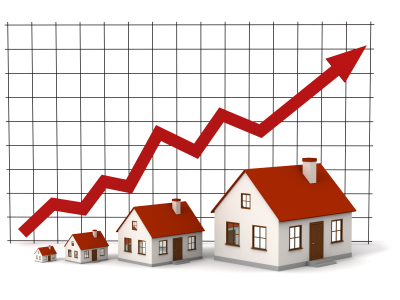

Foram medidos os preços de casas vendidas entre Maio de 2014 e Maio de 2015 em Seattle. Foram anotados 21 atributos descritivos destas casas, como número de quartos e número de banheiros, entre outros.

Os dados estão diponíveis em: https://www.openml.org/d/42731

Será que é possível usar as características das casas para predizer qual deveria ser o seu valor de venda?

### Exemplo 1 - Primeiro passo: carregar os dados

In [8]:
# Para trabalhar com dados em tabelas
import pandas as pd

# Para trabalhar com dados do OpenML
from sklearn.datasets import fetch_openml

# Para trabalhar com gráficos
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
dados = fetch_openml(data_id=42731)

In [10]:
dados

{'data':        bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
 0             3       1.00         1180      5650     1.0           0     0   
 1             3       2.25         2570      7242     2.0           0     0   
 2             2       1.00          770     10000     1.0           0     0   
 3             4       3.00         1960      5000     1.0           0     0   
 4             3       2.00         1680      8080     1.0           0     0   
 ...         ...        ...          ...       ...     ...         ...   ...   
 21608         3       2.50         1530      1131     3.0           0     0   
 21609         4       2.50         2310      5813     2.0           0     0   
 21610         2       0.75         1020      1350     2.0           0     0   
 21611         3       2.50         1600      2388     2.0           0     0   
 21612         2       0.75         1020      1076     2.0           0     0   
 
        condition  grade  sqft

In [11]:
df_casas = pd.DataFrame(data = dados.data, columns=dados.feature_names) # Transformando em dataframe

df_casas.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [12]:
df_casas['price'] = dados.target # Colocando a coluna de preços

In [13]:
df_casas.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,221900.0
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,538000.0
2,2,1.00,770,10000,1.0,0,0,3,6,770,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,180000.0
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,604000.0
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,510000.0


In [14]:
df_casas.info() # Observe que não temos nenhum dado faltando para as colunas de informação

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   bedrooms       21613 non-null  int64   
 1   bathrooms      21613 non-null  float64 
 2   sqft_living    21613 non-null  int64   
 3   sqft_lot       21613 non-null  int64   
 4   floors         21613 non-null  float64 
 5   waterfront     21613 non-null  int64   
 6   view           21613 non-null  int64   
 7   condition      21613 non-null  int64   
 8   grade          21613 non-null  int64   
 9   sqft_above     21613 non-null  int64   
 10  sqft_basement  21613 non-null  int64   
 11  yr_built       21613 non-null  int64   
 12  yr_renovated   21613 non-null  int64   
 13  zipcode        21613 non-null  category
 14  lat            21613 non-null  float64 
 15  long           21613 non-null  float64 
 16  sqft_living15  21613 non-null  int64   
 17  sqft_lot15     21613 non-null  

<Axes: >

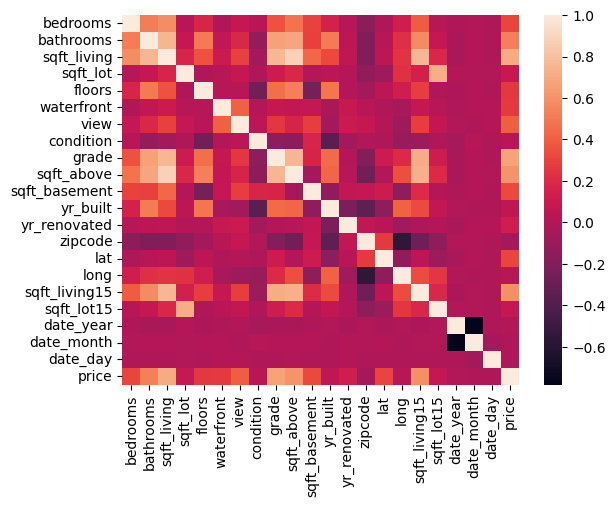

In [15]:
sns.heatmap(df_casas.corr())

### Exemplo 1 - Segundo passo: separar os dados

Precisamos ter claro em nossas mentes quais são os atributos (colunas) preditivas, isto é, aquelas que usaremos para predizer um atributo alvo (coluna alvo).

Quando se trabalhar com Aprendizado de Máquina Supervisionado, além disso precisamos separar nossos dados em dois conjuntos: um **conjunto de treinamento** e um **conjunto de teste**. Fazemos isso para evitar overfitting do algoritmo.

Existem várias estratégias para se separar dados. Vamos aplicar as principais:

(a) Escolher o tamanho dos conjuntos - 80% para treinamento e 20% para teste;

(b) Selecionar aleatoriamente os dados que irão compor o conjunto de treinamento e teste (usando um seed para garantir reprodutibilidade);

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
len(df_casas)

21613

In [18]:
# Escolhendo as colunas preditivas e alvo
x = df_casas.drop(columns=['zipcode', 'price', 'date_year', 'date_month', 'date_day'])
y = df_casas['price']                

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [101]:
len(x_train), len(x_test), len(y_train), len(y_test)

(14364, 3591, 14364, 3591)

### Exemplo 1 - Terceiro passo: escalonar os dados

In [95]:
# vamos pular essa etapa
from sklearn.preprocessing import StandardScaler  # Importando o escalonador de normalização

# Passo 3 - Escalonamento
scaler = StandardScaler()  # Criando o objeto de escalonamento
scaler.fit(x_train)  # Passando os dados de treinamento para encontrar a escala

# Transformando os dados de treinamento e teste
x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

### Exemplo 1 - Quarto passo: treinar o algoritmo 

Vamos usar o conjunto de treinamento para treinar o algoritmo escolhido.

Existem vários algoritmos possíveis. Cada algoritmo tem seus **hiperparâmetros** (parâmetros que devem ser escolhidos para melhorar a performance do algoritmo). Para entender os hiperparâmetros de cada algoritmo é necessário entender a fundo como aquele algoritmo funciona.

Aqui vamos usar um dos algoritmos mais simples existentes, a Regressão Linear:

In [96]:
from sklearn.linear_model import LinearRegression

In [102]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)

lr.fit(x_train_escalonado, y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

LinearRegression()

### Exemplo 1 - Quinto passo: testar e avaliar 

Usando agora o conjunto de teste, iremos testar o classificador criado e treinando no passo anterior.

Uma vez que realizamos um teste, precisamos avaliar o desempenho do nosso método. Diferentes hiperparâmetros e diferentes algoritmos podem ter um desempenho diferente. Apesar de sempre buscarmos o melhor desempenho, devemos levar em consideração outros aspectos para decidir o que é um desempenho aceitável. A primeira coisa a definir são as métricas de desempenho que podem ser comparadas entre diferentes algoritmos. 

Existem várias métricas para se medir o desempenho de um regressor: métricas de performance, métricas de tempo consumido, métricas de memória consumida, etc. Vamos calcular algumas delas:
- MAE
- MSE
- Correlação de Pearson
- $R^2$

In [103]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [104]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_predicoes = lr.predict(x_test_escalonado) 

In [105]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

# Compara com o MAD


MAE:  0.8621195528458988


In [91]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado

# compara com a variança
print('MSE: ', MSE)

# COmpara com o desvio padrão
print('raiz MSE: ', MSE**0.5)

MSE:  1.3297490941034815
raiz MSE:  1.1531474728340176


In [86]:
y_test.std()/(MSE**0.5)

np.float64(5.988597144588948)

A **MAE** e a **MSE** são formas bem simples de avaliar o erro. O problema é como saber se um determinado valor de MAE ou MSE é muito grande? Intuitivamente sabemos que quanto maior esse valor, pior. Entretanto, o valor calculado se refere a escala dos dados, e por isso, pode ser de dificil avaliação. Em geral, devemos comparar duas MAEs ou duas MSEs para dois modelos de regressão diferentes, usando os mesmos dados. Aqueles que tiverem uma MAE ou MSE menores, serão, portanto, melhores.

Neste exemplo, uma MAE de 128157 significa que em média, estamos errando o reço de caça em $128 mil para mais ou para menos.


A escala **R²**, por outro lado, não tem esse problema de comparação. Esse valor já está em uma escala, de forma que sabemos que quanto mais próximo de 1, melhor! Mas atenção, dificilmente um modelo terá R²=1. Então se você obter isso, provavelmente seu modelo está sofrendo de overfitting (ele é muito bom para seus dados, mas não será tão bom para novas entradas). Sempre que você obtiver um valor de R²=1, verifique se não cometeu nenhum erro nos passos anteriores.

In [87]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.9721085714424857


O **coeficiente de correlação de Pearson $\rho$** também é mais fácil de interepretar o resultado já que eles está em uma escala de -1 a 1. Quando estamos avaliando o desempenho do modelo, queremos $\rho=1$. 

In [88]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

ρ: 0.9859577621285471


### Exemplo 1 - O modelo obtido

Nos modelos de Regressão Linear, temos uma função linear de múltiplos coeficientes. Essa função é exatamente o modelo encontrado pelo algoritmo. Para obter os coeficientes, basta fazer:

In [89]:


#Para ver qual colunas são mais importantes podemos escalonar elas e ver quais colunas estão maior que são as mais importantes
a_modelo = lr.coef_      # Coeficientes angulares do modelo (cada um mede a influência de cada coluna)
b_modelo = lr.intercept_ # Coeficiente linear do model

In [90]:
print(a_modelo, b_modelo)

[2.11038392 6.08605416 0.06311119] 66.2152603731551


Durante a etapa de treinamento, métricas de desempenho também são calculadas com o objetivo de se minimizar o erro. Perceba que o R² de treinamento e de teste são diferentes, o que é esperado e desejado. Podemos obter o R² de treinamento, fazendo:

In [32]:
R2_treinamento = lr.score(x_train, y_train)
print(R2_treinamento)

-7.859628520852473e+30


c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


Se o R² de treinamento der muito próximo e 1 e o R² de teste der muito abaixo (0.7, por exemplo), então o modelo está com overfitting.

In [33]:
y_pred_linear = y_predicoes # Salvando as informações do Modelo Reg Linear para comparar depois

### Voltando no passo 4 e trocando o algoritmo para uma Rede Neural Perceptron Multicamada

Redes Neurais Artificiais como o MLP (Multilayer Perceptron) podem ser altamente sensiveis a escala dos dados (assim como as SVM e o KNN).

Vamos primeiro realizar o passo 3 de transformação dos dados: 

In [34]:
from sklearn.preprocessing import StandardScaler # Importando o Escalonador de Normalização

In [35]:
# 3 - Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

Agora vamos criar a rede neural e treinar ela:

In [36]:
from sklearn.neural_network import MLPRegressor # Importando a Rede Neural MLP para Regressão

In [37]:
# 4 - Treino
# Instanciando o objeto
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(10,4), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train_escalonado, y_train)  # Treinando (perceba que estamos passando o x_train escalonado)

MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

In [38]:
# 5 - Teste
y_predicoes = ml_perceptron.predict(x_test_escalonado) # Perceba que estamos passando o x_test escalonado

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apneas neste caso de utilização)

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)

R2:  0.8458833604881946
ρ: 0.9214485818030529
MAE:  81934.22459525858
MSE:  23298846865.4699


In [39]:
y_predicoes_mlp = y_predicoes

#### Gráfico de acerto

Podemos visualizar nossos acertos através de um gráfico de dispersão entre y_test e y_pred. Perceba que se nosso modelo acerta tudo, y_test=y_pred. Dessa forma, teriamos uma reta perfeita com ângulo de inclinação de 45°. Entretanto, se nosso modelo não acertar tudo, então teremos uma outra reta, com outro ângulo de inclinação.

In [40]:
import seaborn as sns

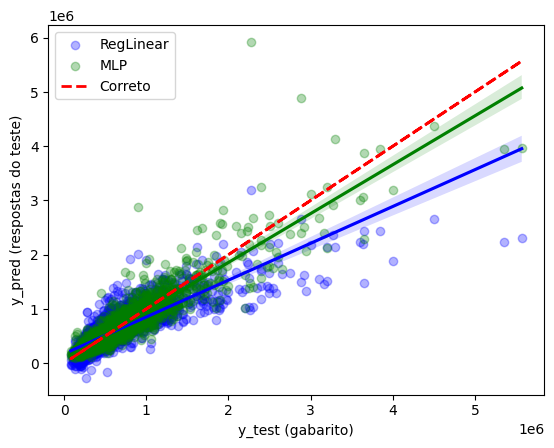

In [41]:
ax = sns.regplot(x=y_test,y=y_pred_linear,
                 color="b", scatter_kws={'alpha':0.3}, label='RegLinear') # Regressão Linear
ax = sns.regplot(x=y_test,y=y_predicoes_mlp,
                 color="g", scatter_kws={'alpha':0.3}, label='MLP') # Rede Neural
ax.plot(y_test, y_test, 'r--', linewidth = 2, label='Correto') # Reta 100% correto
ax.set(xlabel='y_test (gabarito)', ylabel='y_pred (respostas do teste)') 
ax.legend()
#ax.set_xscale('log'), ax.set_yscale('log')

E se tivessemos escalonado os dados para passar pela Regressão Linear? Qual seria o resultado?

------------------------------
## Exemplo 2 - Fifa 2019 
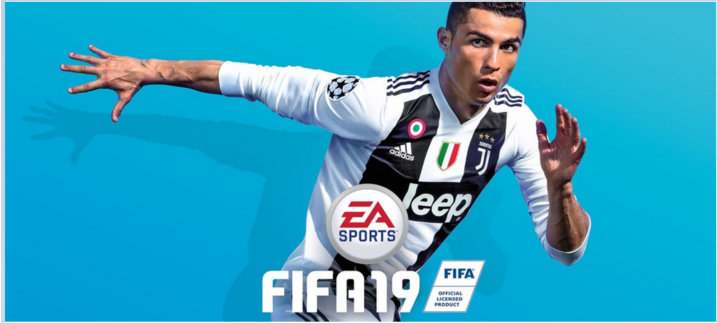

Contém dados de diversos jogadores de futebol presentes no Jogo FiFa 2019 da EAGames. 

Os dados são públicos no Kaggle em https://www.kaggle.com/karangadiya/fifa19


Queremos prever a performance total do jogador dada pela coluna Overall, usando a idade do jogador (coluna Age), o valor do jogador (coluna Value) e o seu salário (coluna Wage).

### Exemplo 2 - Primeiro passo: carregar os dados e fazer a análise exploratória

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
# Carregando os dados
dados_fifa = pd.read_csv('data_fifa2019.csv', index_col = 0)

In [44]:
dados_fifa.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


Vamos olhar como estão os dados das colunas através do .info()

Perceba que as colunas desejadas como preditoras não possuem dados vazios.

In [45]:
#dados_fifa.info()

Vamos converter as colunas Value e Wage que estão em strings para valores numéricos em Euros:

In [46]:
dados_fifa['Value'][0]

'€110.5M'

In [47]:
def convert_currency(valor):
    valor = valor.replace('€','')
    
    if 'K' in valor:
        valor = 1000*float(valor.replace('K',''))
    elif 'M' in valor:
        valor = 1000000*float(valor.replace('M',''))
    else:
        valor = float(valor)
        
    return valor

In [48]:
dados_fifa['Value'] = dados_fifa['Value'].apply(convert_currency)
dados_fifa['Wage'] = dados_fifa['Wage'].apply(convert_currency)

In [49]:
dados_fifa['Value'][0]

np.float64(110500000.0)

### Exemplo 2 - Segundo passo: separar os dados

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# Escolhendo as colunas preditivas e alvo
x = dados_fifa[['Age','Value','Wage']] # Selecionando 3 colunas (perceba o uso de dois colchetes)
y = dados_fifa['Overall']                # Valor alvo

# Dividindo conjunto de treinamento e conjunto de teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [52]:
x.describe()

,Age,Value,Wage
count,18207.000000,1.820700e+04,18207.000000
mean,25.122206,2.410696e+06,9731.312133
std,4.669943,5.594933e+06,21999.290406
min,16.000000,0.000000e+00,0.000000
25%,21.000000,3.000000e+05,1000.000000
50%,25.000000,6.750000e+05,3000.000000
75%,28.000000,2.000000e+06,9000.000000
max,45.000000,1.185000e+08,565000.000000


### Exemplo 2 - Terceiro passo: transformar os dados

In [53]:
from sklearn.preprocessing import StandardScaler # Importando o Escalonador de Normalização


In [54]:
# Passo 3 - Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

### Exemplo 2 - Quarto passo: treinar o modelo

Vamos Escalonar os dados antes de usá-los, realizando assim o passo intermediário de transformação.

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)

lr.fit(x_train_escalonado,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

LinearRegression()

### Exemplo 2 - Quinto passo: testar e avaliar

In [57]:
from sklearn.metrics import r2_score

In [58]:
y_predicoes = lr.predict(x_test_escalonado) 

In [59]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2:  0.5538479139401105
MAE:  3.561127570708574
MSE:  20.74946916035346
raiz MSE:  4.555158521978512


### Voltando para a análise exploratória 

Vamos aprender como transformar as colunas através de outras funções matemáticas

Nem sempre a relação entre os dados é puramente linear. Por vezes temos relações polinômias, sinusoidais, entre outras. 

Como podemos adequar nossos dados com relações diferentes para modelos de Regressão Linear?

Primeiro vamos tentar ver como nossos dados se relacionam plotando gráficos de dispersão entre as colunas descritivas e colunas alvo:

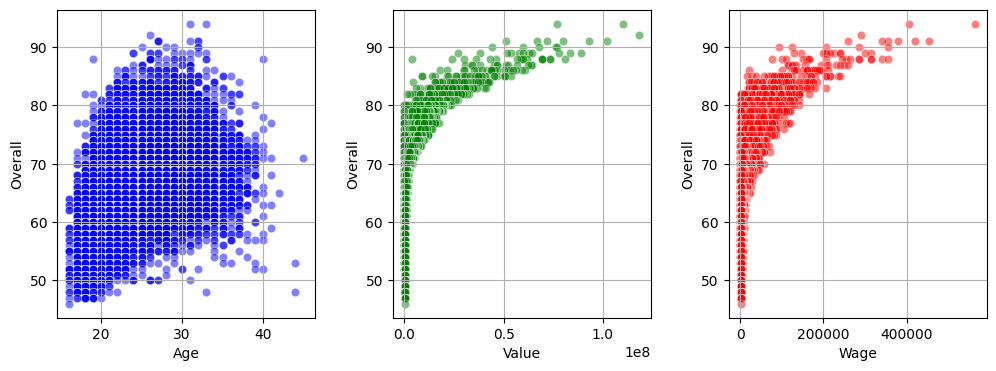

In [60]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))

# Plot de dispersão (scatter)
sns.scatterplot(ax = ax[0], data = dados_fifa, x = 'Age',   y='Overall', color='b', alpha=0.5)
sns.scatterplot(ax = ax[1], data = dados_fifa, x = 'Value', y='Overall', color='g', alpha=0.5)
sns.scatterplot(ax = ax[2], data = dados_fifa, x = 'Wage',  y='Overall', color='r', alpha=0.5)

# Aqui estamos explicitamente dando nome aos eixos do gráfico
ax[0].set_xlabel('Age'), ax[0].set_ylabel('Overall')
ax[1].set_xlabel('Value'), ax[1].set_ylabel('Overall')
ax[2].set_xlabel('Wage'), ax[2].set_ylabel('Overall')

# Colocando grid
ax[0].grid(), ax[1].grid(), ax[2].grid()

#ax[1].set_xscale('log')
#ax[2].set_xscale('log')

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.3)

# Aumentando o tamanho da fonte (letra)
plt.rcParams.update({'font.size': 12})

Nossos gráficos sugerem que o Overall depende mais linearmente do logaritmo de Wage e do logaritmo de Value. 

O Numpy tem várias funções matemáticas prontas (https://numpy.org/doc/stable/reference/routines.math.html), entre elas o log10, que tira o logaritmo na base 10 do valor passado. Vamos usar essa função para transformar nossos dados.

In [61]:
import numpy as np # O numpy tem funções matemáticas variadas prontas dentro dele
from sklearn.preprocessing import FunctionTransformer  # Módulo para transformar dados por funções

In [62]:
# Criando nosso transformador
transformador = FunctionTransformer(np.log10)

In [63]:
x1 = dados_fifa['Age']
x2 = transformador.transform(dados_fifa['Value'])
x3 = transformador.transform(dados_fifa['Wage'])

c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [64]:
dados_modelo_log = {'Age':x1,
               'log_Value':x2,
               'log_Wage':x3,
               'Overall':dados_fifa['Overall']
            }

In [65]:
dados_modelo_log = pd.DataFrame(data=dados_modelo_log)

In [66]:
dados_modelo_log.describe()

c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\Pedro Henrique\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,Age,log_Value,log_Wage,Overall
count,18207.000000,1.820700e+04,1.820700e+04,18207.000000
mean,25.122206,-inf,-inf,66.238699
std,4.669943,NaN,NaN,6.908930
min,16.000000,-inf,-inf,46.000000
25%,21.000000,5.477121e+00,3.000000e+00,62.000000
50%,25.000000,5.829304e+00,3.477121e+00,66.000000
75%,28.000000,6.301030e+00,3.954243e+00,71.000000
max,45.000000,8.073718e+00,5.752048e+00,94.000000


In [67]:
dados_modelo_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18207 entries, 0 to 18206
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        18207 non-null  int64  
 1   log_Value  18207 non-null  float64
 2   log_Wage   18207 non-null  float64
 3   Overall    18207 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 1.2 MB


O problema de usar a função logaritmica é que ela não é definida para o zero e valores negativos. Dessa forma ela gera valores -inf quando não consegue calcular. Vamos substituir todos os valores -inf por 0.

In [68]:
dados_modelo_log.replace([np.inf, -np.inf], 0, inplace=True)

In [69]:
dados_modelo_log.describe()

,Age,log_Value,log_Wage,Overall
count,18207.000000,18207.000000,18207.000000,18207.000000
mean,25.122206,5.833391,3.546461,66.238699
std,4.669943,0.919456,0.671465,6.908930
min,16.000000,0.000000,0.000000,46.000000
25%,21.000000,5.477121,3.000000,62.000000
50%,25.000000,5.829304,3.477121,66.000000
75%,28.000000,6.301030,3.954243,71.000000
max,45.000000,8.073718,5.752048,94.000000


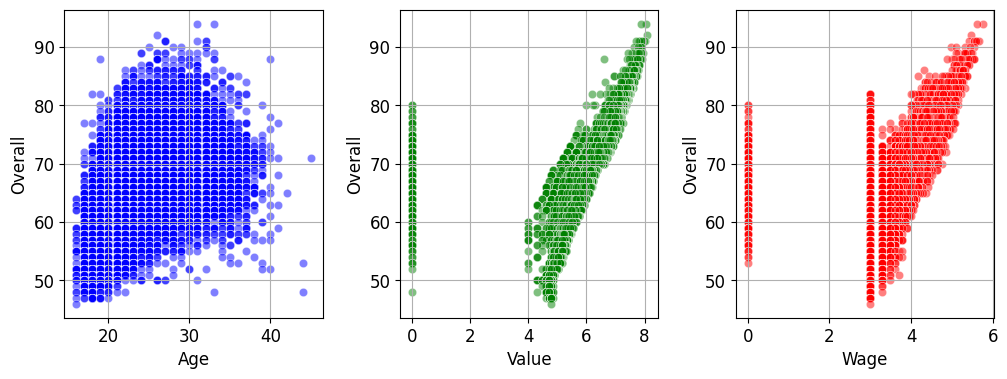

In [70]:
fig, ax = plt.subplots(1,3, figsize=(12, 4))

# Plot de dispersão (scatter)
sns.scatterplot(ax = ax[0], data = dados_modelo_log, x = 'Age',   y='Overall', color='b', alpha=0.5)
sns.scatterplot(ax = ax[1], data = dados_modelo_log, x = 'log_Value', y='Overall', color='g', alpha=0.5)
sns.scatterplot(ax = ax[2], data = dados_modelo_log, x = 'log_Wage',  y='Overall', color='r', alpha=0.5)

# Aqui estamos explicitamente dando nome aos eixos do gráfico
ax[0].set_xlabel('Age'), ax[0].set_ylabel('Overall')
ax[1].set_xlabel('Value'), ax[1].set_ylabel('Overall')
ax[2].set_xlabel('Wage'), ax[2].set_ylabel('Overall')

# Colocando grid
ax[0].grid(), ax[1].grid(), ax[2].grid()

# Vamos aumentar a separação entre os gráficos
plt.subplots_adjust(wspace = 0.3)

# Aumentando o tamanho da fonte (letra)
plt.rcParams.update({'font.size': 12})

In [71]:
# Removendo os zeros

In [72]:
dados_modelo_log2  = dados_modelo_log[dados_modelo_log['log_Value']>0]
dados_modelo_log3  = dados_modelo_log2[dados_modelo_log2['log_Wage']>0]

Treinando um algoritmo de Regressão Linear para prever o overall:

In [73]:
# Passo 2 - Separando dados
x = dados_modelo_log3.drop(columns=['Overall']) # Selecionando 3 colunas
y = dados_modelo_log3['Overall']                # Valor alvo
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Passo 3 - Escalonamento
scaler = StandardScaler() # Criando o objeto de escalonamento
scaler.fit(x_train) # Passando os dados de treinamento para encontrar a escala

x_train_escalonado = scaler.transform(x_train)
x_test_escalonado = scaler.transform(x_test)

# Passo 4 - Treinar
lr = LinearRegression()  # Criamos o objeto do regressor (não mudamos nenhum hiperpârametro)
lr.fit(x_train_escalonado,y_train) # Treinamos o regressor passando apenas o conjunto de dados de treinamento 

# Passo 5 - Avaliar
y_predicoes = lr.predict(x_test_escalonado) 

R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

R2:  0.9721085714424857
MAE:  0.8621195528458988
MSE:  1.3297490941034815
raiz MSE:  1.1531474728340176


------------------------------
## Exercício - Fifa2019 (a)

Por que existe um grupo de jogadores com salário igual a zero e valor igual a zero?

Quem são eles?

In [74]:
## Coloque seu código aqui

In [75]:
## Coloque sua resposta aqui

------------------------------
## Exercício - Fifa2019 (b)

Agora queremos repetir o exemplo 2 usando outras colunas de dados, inclusive colunas que não possuem todos os valores para cada jogador.

Pense em colunas que você acredita serem importantes para o modelo. Selecione-as. 

Em seguida, escolha um modelo de Regressão. Pode ser uma Regressão Linear simples, uma Rede Neural Perceptron Multicamada ou uma Regressão Linear modificada para Funções Não Lineares.

Qual foi o R² obtido?

### Exercício - Primeiro passo: carregar os dados

In [76]:
import pandas as pd

In [77]:
# Carregando os dados
dados_fifa = pd.read_csv('data_fifa2019.csv', index_col = 0)

In [78]:
dados_fifa.head(3)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [79]:
# Arrumando as colunas com de Valor, Salário e Peso para serem colunas numéricas
dados_fifa['Value'] = convert_currency(dados_fifa.Value)
dados_fifa['Wage'] = convert_currency(dados_fifa.Wage)
dados_fifa['Weight'] = dados_fifa.Weight.str.rstrip('lbs').astype('float')


# Selecionando colunas com valores numéricos
colunas_selecionadas = dados_fifa[['Age', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation',
                                   'Weight','HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
                                   'FKAccuracy','LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                   'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina',
                                   'Strength', 'LongShots', 'GKPositioning','Aggression', 'Interceptions',
                                   'Positioning', 'Vision', 'Penalties','Composure','Marking', 'StandingTackle',
                                   'SlidingTackle', 'GKDiving','GKHandling','GKKicking','GKReflexes', 'Overall']]

TypeError: cannot convert the series to <class 'float'>

In [ ]:
# Excluindo desse meu conjunto de colunas selecionadas as linhas que tem algum valor nulo
df_fifa_selecionados = colunas_selecionadas.dropna()

In [ ]:
df_fifa_selecionados.info()

In [ ]:
df_fifa_selecionados.head()

### Exercício - Segundo passo: separar os dados

In [ ]:
## Coloque seu código aqui

### Exercício - Terceiro passo: escalonar os dados

In [ ]:
## Coloque seu código aqui

### Exercício - Quarto passo: treinar o modelo

In [ ]:
## Coloque seu código aqui

### Exercício - Quinto passo: testar e avaliar

In [ ]:
## Coloque seu código aqui